In [1]:
import PyWGCNA

In [2]:
geneExp = "./Data/WGCNA/tcga_tpm_filtered.csv"
pyWGCNA_TCGA_PAAD = PyWGCNA.WGCNA(name='TCGA_PAAD', 
                              species='Homo sapiens', 
                              geneExpPath=geneExp, 
                              outputPath='./Results/WGCNA',
                              save=True)

pyWGCNA_TCGA_PAAD.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...
Figure directory does not exist!
Creating figure directory!


,A1BG,A1CF,A2ML1,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AADAT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB6-01,2.582366,0.059339,23.669621,948.685873,32.280480,0.043939,50.290441,31.456648,0.300065,1.789154,...,10.583687,9.939176,19.762719,0.194290,3.288530,15.173381,5.610778,1466.619700,5.065238,8.937085
TCGA-2J-AAB8-01,2.143546,0.297646,0.267661,1948.154812,13.730206,0.428548,58.639923,44.817288,10.535877,3.015667,...,10.906417,14.687887,21.471663,0.576073,5.285256,14.495063,6.778444,886.973057,5.857872,10.978383
TCGA-2J-AAB9-01,2.993780,0.141397,7.616435,2464.440435,29.491875,1.722305,47.320853,31.671784,4.921656,2.404827,...,9.984016,8.038067,11.339107,0.700004,4.245112,12.282175,4.827487,923.683110,5.748141,7.750496
TCGA-2J-AABA-01,3.945873,0.173390,14.500779,1461.062201,23.214347,0.299574,47.863918,63.694195,3.034670,2.368634,...,11.872025,9.977575,8.093151,0.890181,4.571979,27.732776,9.882640,771.116981,10.128048,15.005296
TCGA-2J-AABE-01,3.012999,0.027238,1.185511,1503.872450,24.932207,1.609468,51.591192,83.666330,8.613094,3.438124,...,8.812077,7.309420,10.549602,0.918945,6.431797,18.776217,5.644429,1140.924338,5.914325,8.483684


Pre-processing...
	Detecting genes and samples with too many missing values...


	Done pre-processing..



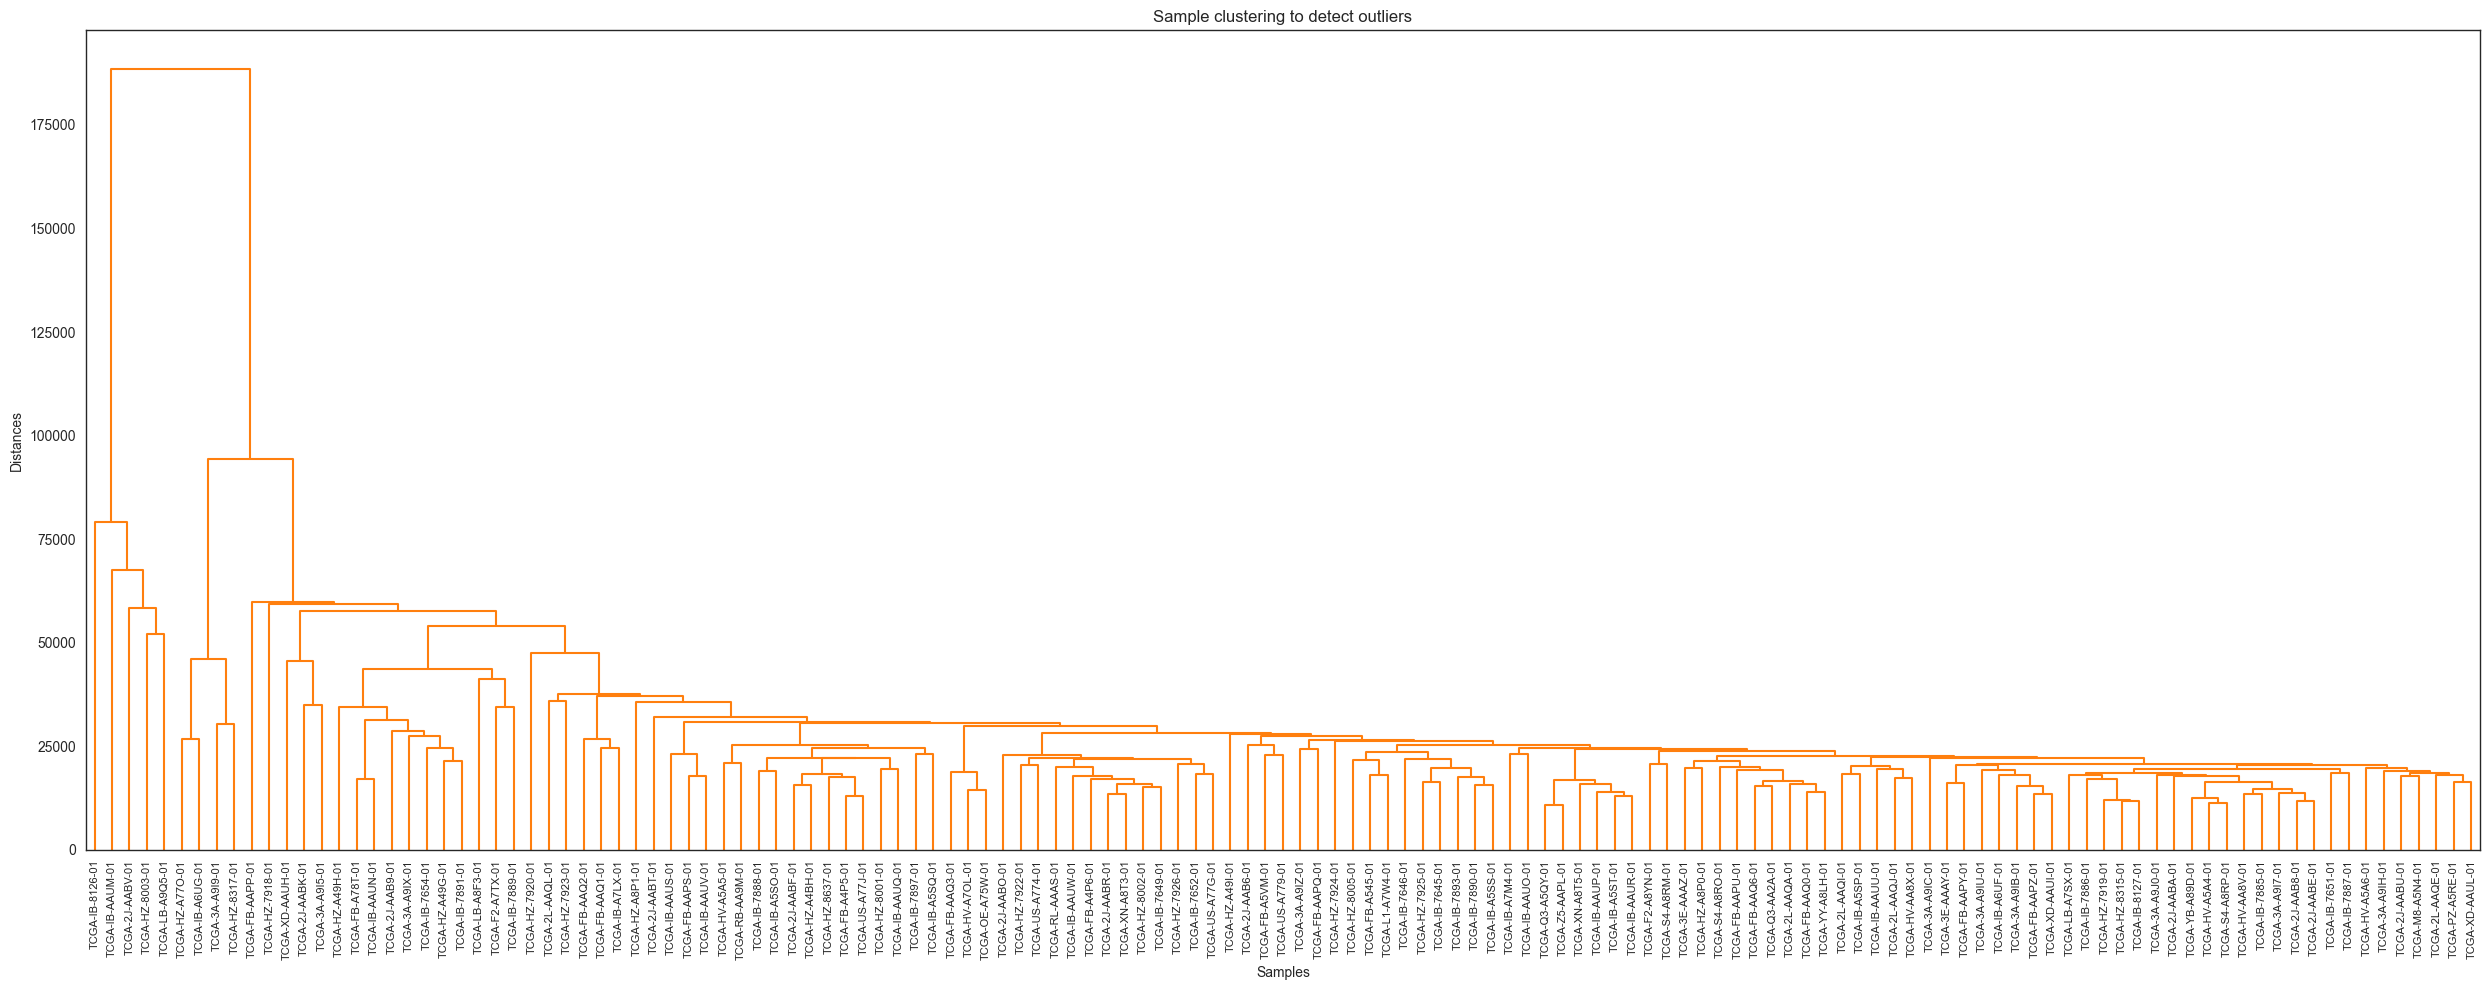

In [3]:
pyWGCNA_TCGA_PAAD.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  3215
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.077175  0.357874       0.688354  2127.402185  2078.580077   
1       2  0.358534 -0.814815       0.873215   714.879147     634.7299   
2       3  0.649392 -1.291788       0.931218   299.517695   237.708519   
3       4  0.750295 -1.600796       0.939552    144.71472   100.059919   
4       5  0.764796 -1.809551       0.929123    77.470682    46.429936   
5       6  0.750874 -1.937151       0.918297    44.872467    22.843688   
6       7    0.7631 -1.913608        0.92269    27.690153    11.959245   
7       8  0.775067 -1.818185       0.911221    18.009474     6.625256   
8       9  0.897666 -1.587818       0.970679     12.24819     3.790142   
9      10   0.91159 -1.635705       0.987376     8.657417     2.249763   
10     11  0.928767 -1.633226       0.994493     6.328765     1.360732   
11     13

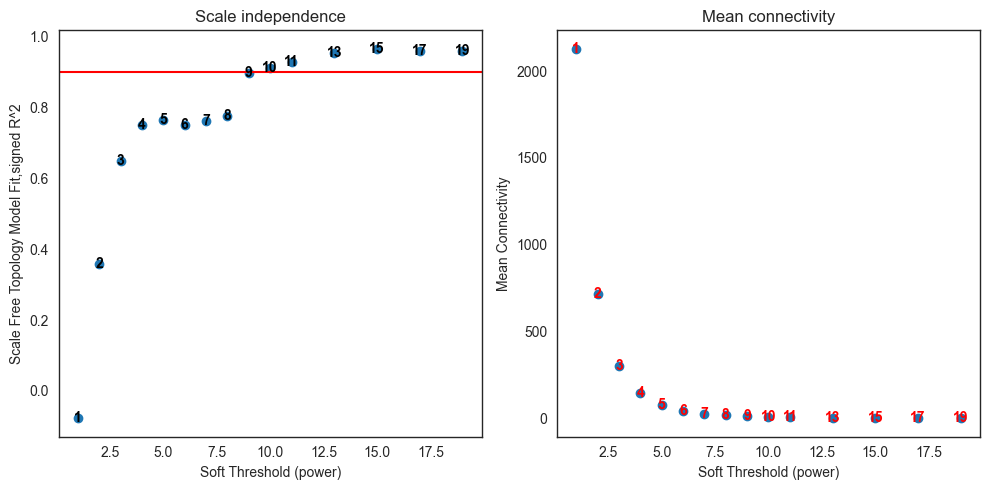

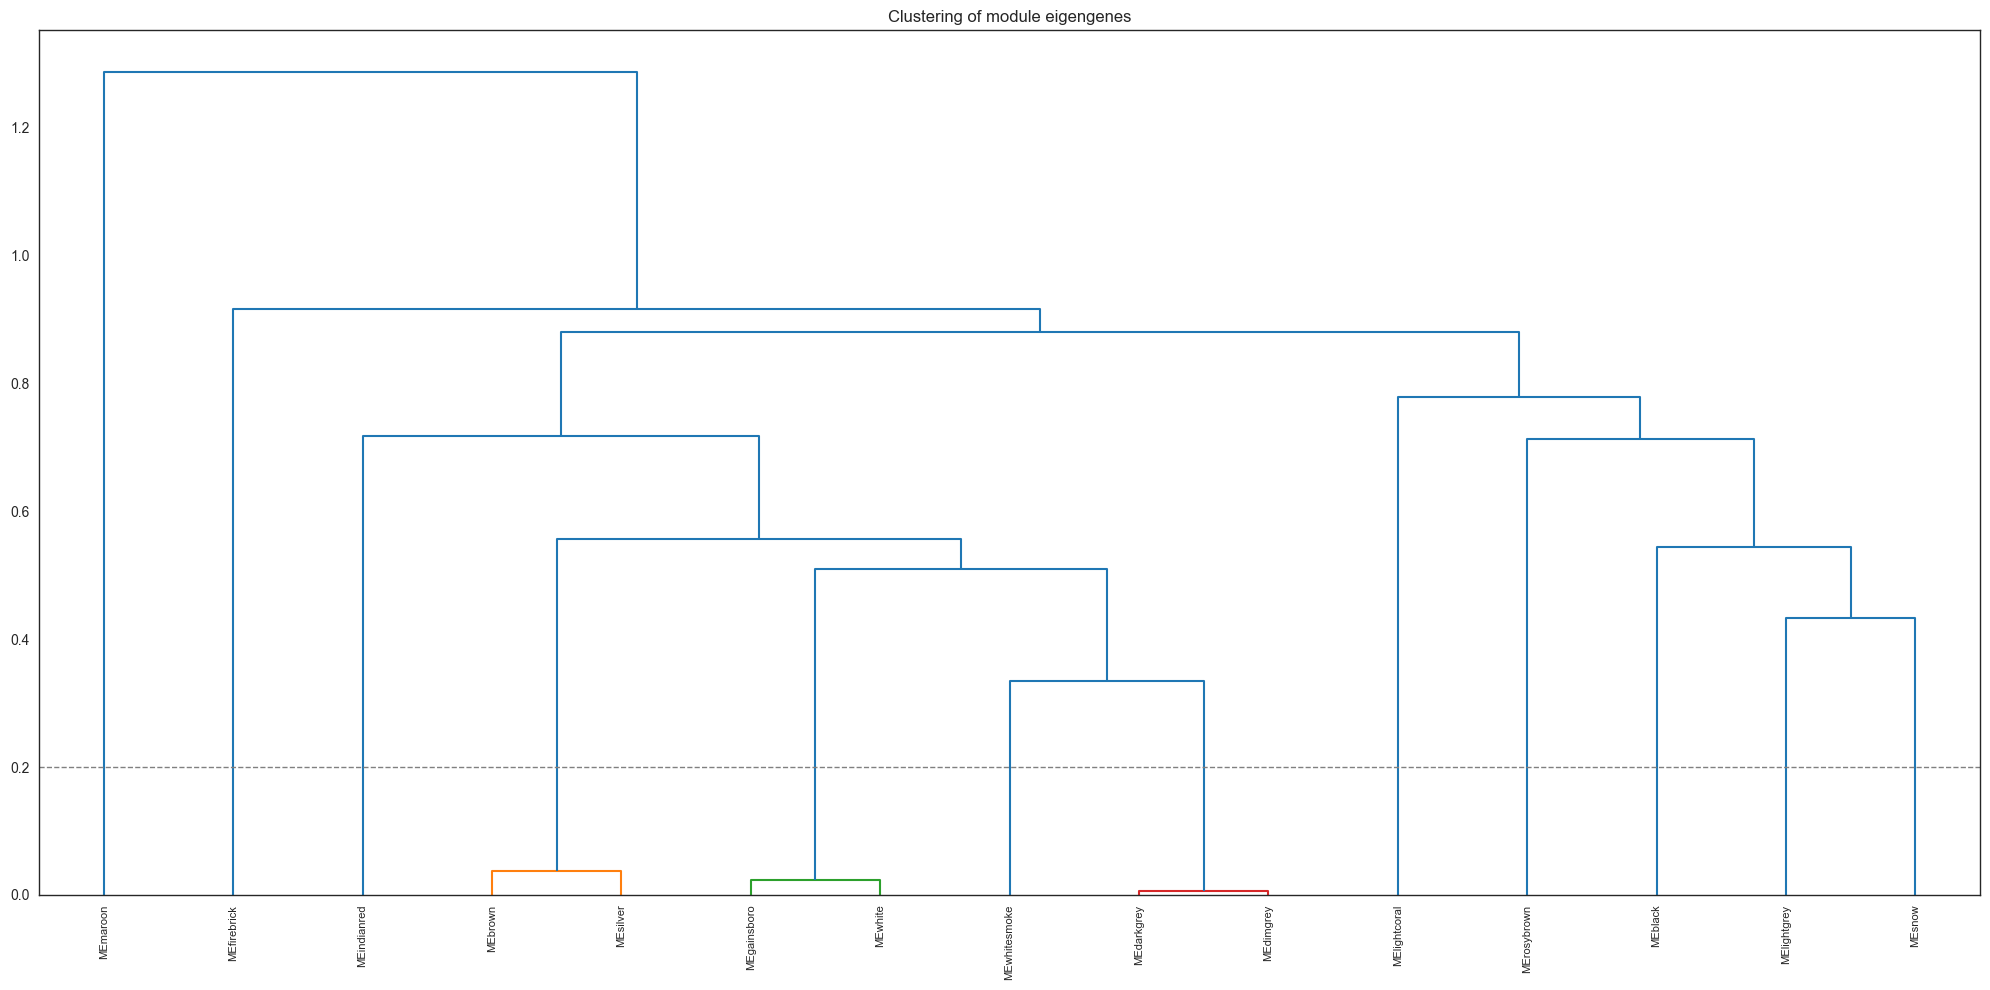

In [4]:
pyWGCNA_TCGA_PAAD.findModules() # Extract the modules of coexpressed genes

In [5]:
# Charge the metadata info and give a unique color for each condition of the metadata features
pyWGCNA_TCGA_PAAD.updateSampleInfo(path='./Data/WGCNA/sampleInfo_sep_cls.csv')

import matplotlib.colors as colors

color_list = [color for color in colors.CSS4_COLORS.keys()]    

color_ind= 0

for col in pyWGCNA_TCGA_PAAD.datExpr.obs.columns:

    color_dict={}
    for i in pyWGCNA_TCGA_PAAD.datExpr.obs[col].unique():
        
        color_dict[i]= color_list[color_ind]
        color_ind+=1
        
    color_ind+=1
    
    pyWGCNA_TCGA_PAAD.setMetadataColor(col, color_dict)
       
pyWGCNA_TCGA_PAAD.metadataColors

{'gender': {'male': 'aliceblue', 'female': 'antiquewhite'},
 'age': {1: 'aquamarine', 0: 'azure'},
 'T': {'T34': 'bisque', 'T12': 'black'},
 'N': {'N0': 'blue', 'N1': 'blueviolet'},
 'M': {'M0': 'burlywood', 'MX': 'cadetblue'},
 'grade': {'G12': 'chocolate', 'G34': 'coral'},
 'Cluster 1': {0: 'cornsilk', 1: 'crimson'},
 'Cluster 0': {1: 'darkblue', 0: 'darkcyan'}}

In [6]:
geneList = PyWGCNA.getGeneList(dataset='hsapiens_gene_ensembl',
                               attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])


pyWGCNA_TCGA_PAAD.updateGeneInfo(geneList)

In [7]:
pyWGCNA_TCGA_PAAD.analyseWGCNA(show=False)

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
GO directory does not exist!
Creating GO directory!
No enrich terms when cutoff = 1 in module brown
No enrich terms when cutoff = 1 in module lightgrey
No enrich terms when cutoff = 1 in module darkgrey
No enrich terms when cutoff = 1 in module gainsboro
No enrich terms when cutoff = 1 in module rosybrown
No enrich terms when cutoff = 1 in module maroon
No enrich terms when cutoff = 1 in module firebrick
No enrich terms when cutoff = 1 in module lightcoral
No enrich terms when cutoff = 1 in module black
No enrich terms when cutoff = 1 in module indianred
No enrich terms when cutoff = 1 in module snow
No enrich terms when cutoff = 1 in module whitesmoke
	Done..



In [35]:
pyWGCNA_TCGA_PAAD.datExpr.var

,dynamicColors,moduleColors,moduleLabels,gene_name,gene_biotype
A1BG,brown,brown,1.0,NaN,NaN
A1CF,lightgrey,lightgrey,7.0,NaN,NaN
A2ML1,lightgrey,lightgrey,7.0,NaN,NaN
A2M,darkgrey,darkgrey,2.0,NaN,NaN
A4GALT,lightgrey,lightgrey,7.0,NaN,NaN
...,...,...,...,...,...
ZXDC,lightgrey,lightgrey,7.0,NaN,NaN
ZYG11B,darkgrey,darkgrey,2.0,NaN,NaN
ZYX,indianred,indianred,5.0,NaN,NaN
ZZEF1,darkgrey,darkgrey,2.0,NaN,NaN


In [18]:
df_varinfo = pyWGCNA_TCGA_PAAD.datExpr.var # Extrat the variables info

In [20]:
brown = df_varinfo.index[df_varinfo.moduleColors=="brown"].tolist() # genes in the brown module
darkgrey = df_varinfo.index[df_varinfo.moduleColors=="darkgrey"].tolist() # genes in the darkgray module


In [30]:
from utils import Functional_analysis 

# Perform the over expression analysis
Functional_analysis.run_ora(brown,datasets=["MSigDB_Hallmark_2020","GO_Molecular_Function_2023","GO_Cellular_Component_2023","GO_Biological_Process_2023"],figsize=(3,12),
                            save_path="./Results/WGCNA/figures/brown_ora.png",size=4)


In [31]:
# Perform the over expression analysis
Functional_analysis.run_ora(darkgrey,datasets=["MSigDB_Hallmark_2020","GO_Molecular_Function_2023","GO_Cellular_Component_2023","GO_Biological_Process_2023"],figsize=(3,12),
                            save_path="./Results/WGCNA/figures/darkgrey_ora.png",size=4)